# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

BoomBikes, a U.S. bike-sharing company, seeks to understand factors that impact the demand for shared bikes, particularly after the COVID-19 pandemic and lockdown.
Essentially, the company wants —

- To Perform EDA to identify  patterns and relationship between features like weather, season, year, temp etc.. against the target variable 'cnt' (indicating total number of bike rentals)

- Build a multiple linear regression model to predict the demand for shared bikes, using various independent variables.

- The model will help BoomBikes understand which factors influence bike demand and how to adjust business strategies for future growth, especially as the market recovers from the pandemic.



## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1262]:
import warnings
warnings.filterwarnings('ignore')

In [1263]:
import numpy as np
import pandas as pd

In [1264]:
bikes = pd.read_csv("day.csv")

In [1265]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1266]:
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weathersit_mapping = {1:'Clear',2:'Cloudy',3:'LightRainSnow',4:'HeavyRainSnow'}

In [1267]:
bikes['season'] = bikes['season'].replace(season_mapping)
bikes['weathersit'] = bikes['weathersit'].replace(weathersit_mapping)
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1268]:
# Finding RelationShip between season and months
season_months = bikes.groupby('season')['mnth'].unique()
print(season_months)

season
fall         [6, 7, 8, 9]
spring      [1, 2, 3, 12]
summer       [3, 4, 5, 6]
winter    [9, 10, 11, 12]
Name: mnth, dtype: object


In [1269]:
# Dropping the below columns since they are not significant and redundant
bikes = bikes.drop(columns=['instant','dteday','casual','registered'])
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1270]:
bikes.shape

(730, 12)

In [1271]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 68.6+ KB


In [1272]:
# Describe numberical values to see if theer are any sort ot outliers that need to be handled
bikes.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising the Data

**Understanding the data**.
- Identify multicollinearity if it exists
- Identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

**Outcome**.
- **temp , yr, season , weather_sit** have a strong association with target cnt
- **holiday , working day** have a correlation with target cnt but not very signoficant 
- **weekday, mnth are dropped** since the same reference can be obtained from other fields like holiday and season
- multicollinearity exists bewteen fields **temp , atemp** 

In [1274]:
import matplotlib.pyplot as plt
import seaborn as sns

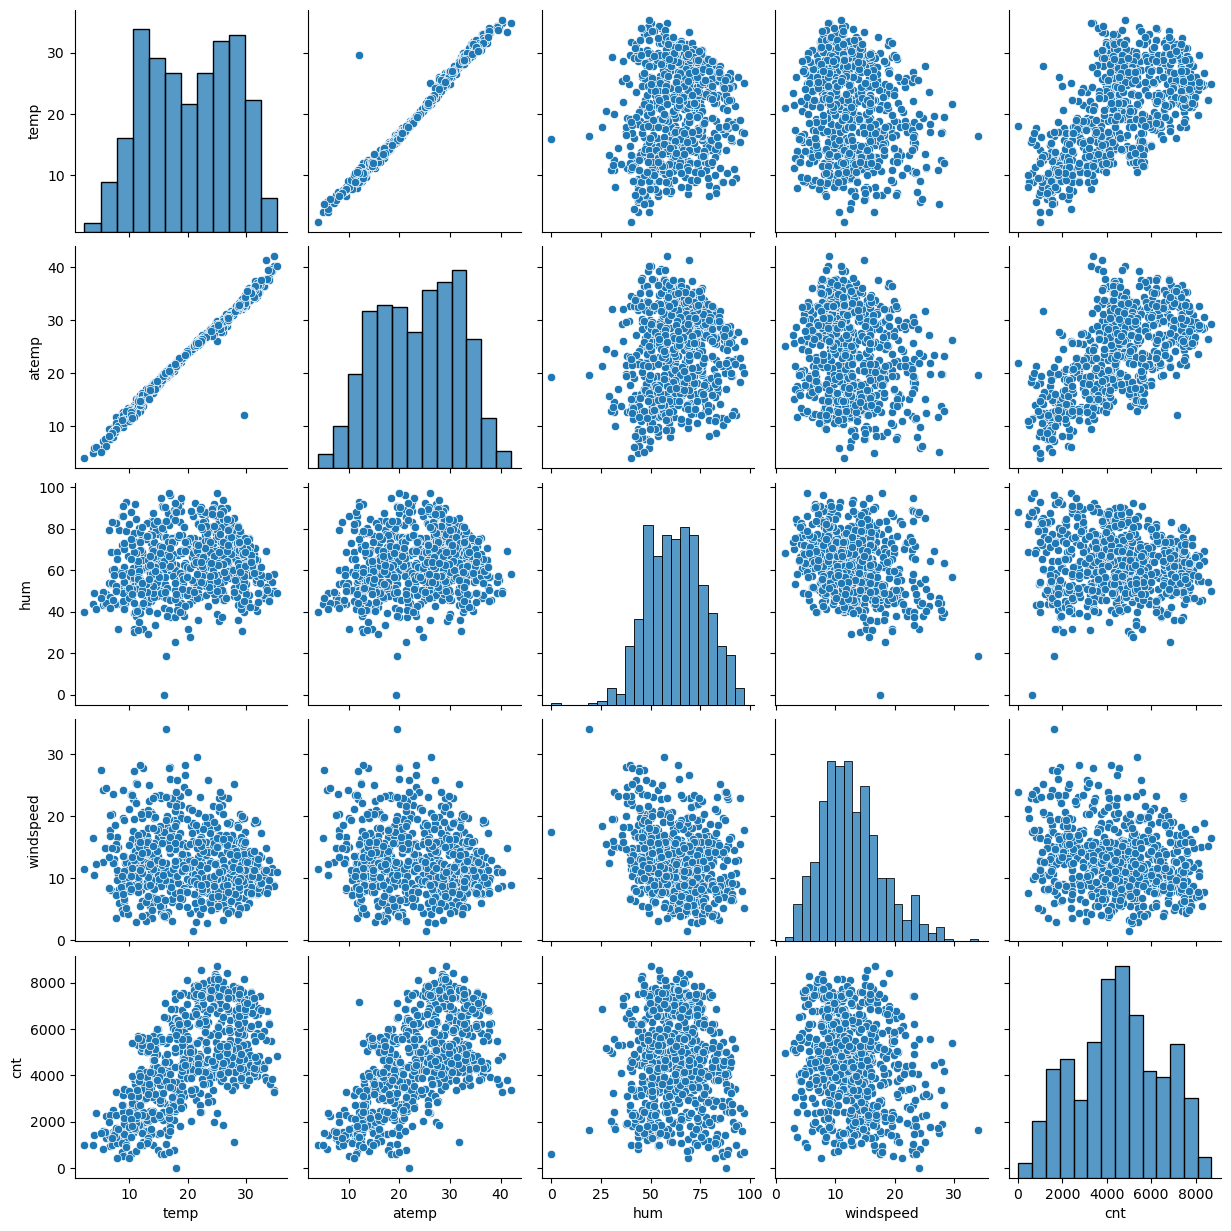

In [1275]:
# Pairplot plot for numerical columns
numeric_cols = ['temp','atemp','hum','windspeed']
categorical_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
numeric_data = bikes.drop(columns=categorical_cols)
sns.pairplot(numeric_data)
plt.show()

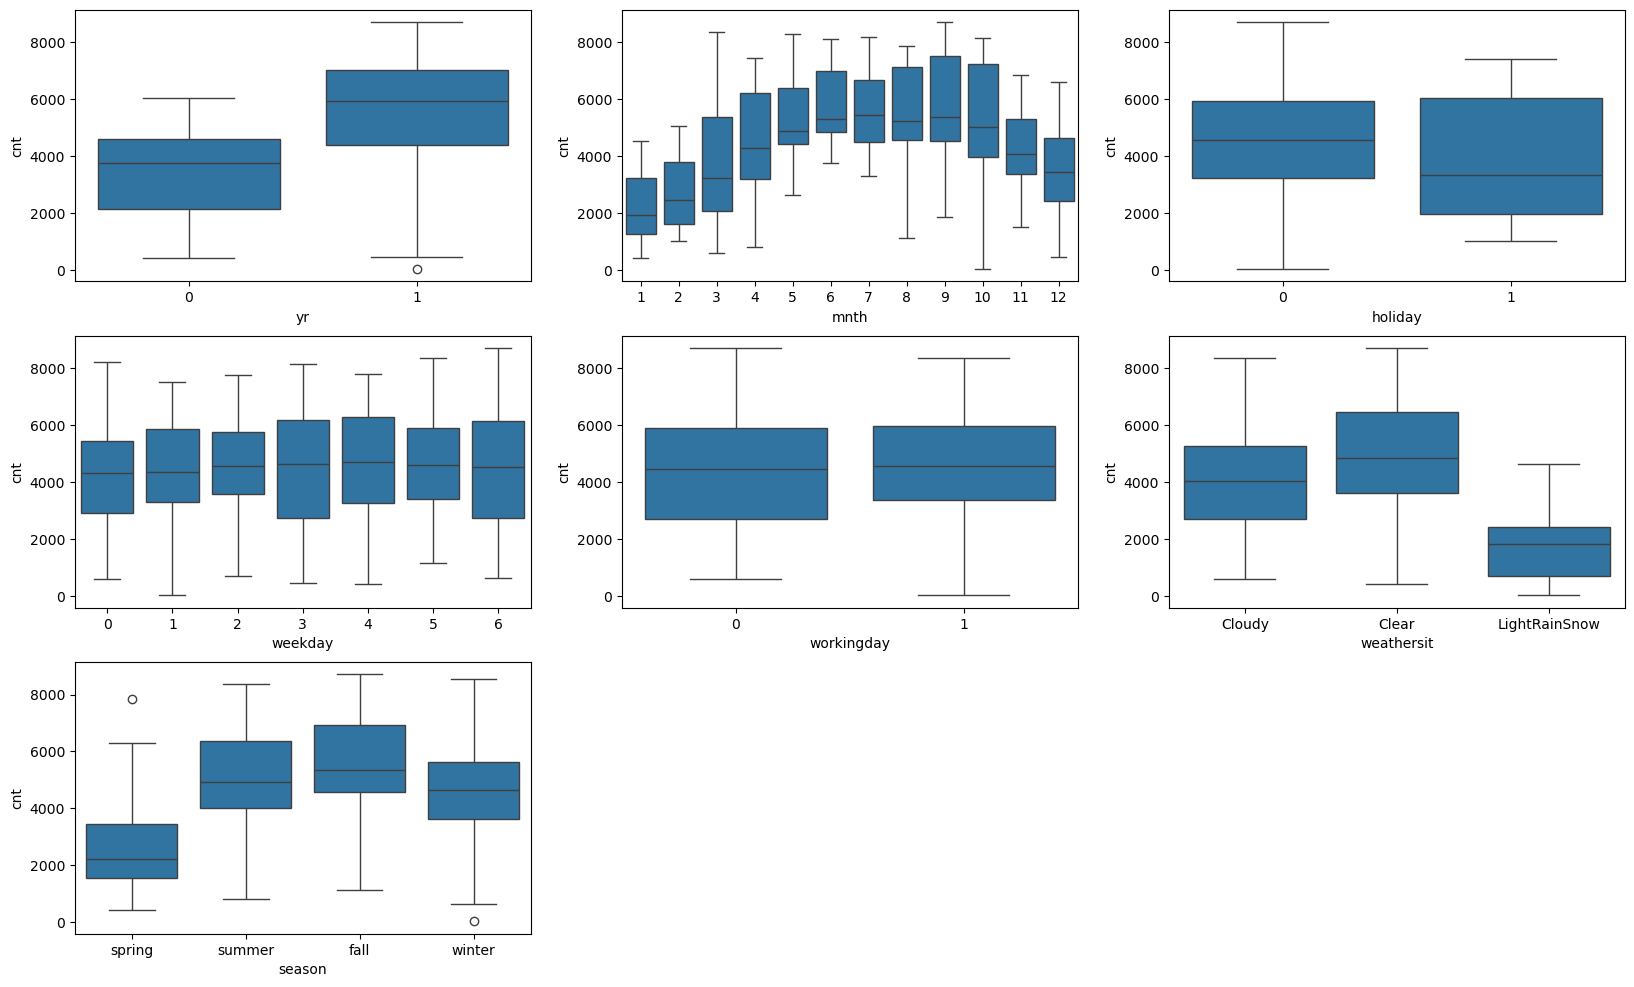

In [1276]:
# Boxplot for categorical fields
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.show()

In [1277]:
# Further Dropping columns 
bikes =bikes.drop(columns=['weekday','mnth'])

In [1278]:
bikes.head(5)

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,0,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Data Preparation , Dummy Variables for Categorical fields 

In [1280]:
# One-hot encode the categorical columns: 'season', 'mnth', 'weekday', and 'weathersit'
bikes_encoded = pd.get_dummies(bikes, columns=['season', 'weathersit'], drop_first=True)


In [1281]:
bikes_encoded.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Cloudy,weathersit_LightRainSnow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,True,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,False,True,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,False


In [1282]:
bikes_encoded = bikes_encoded.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [1283]:
bikes_encoded.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Cloudy,weathersit_LightRainSnow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [1285]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train , df_test = train_test_split(bikes_encoded, train_size = 0.7, test_size = 0.3 , random_state = 100)

In [1286]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1287]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Cloudy,weathersit_LightRainSnow
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0


In [1288]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Cloudy,weathersit_LightRainSnow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


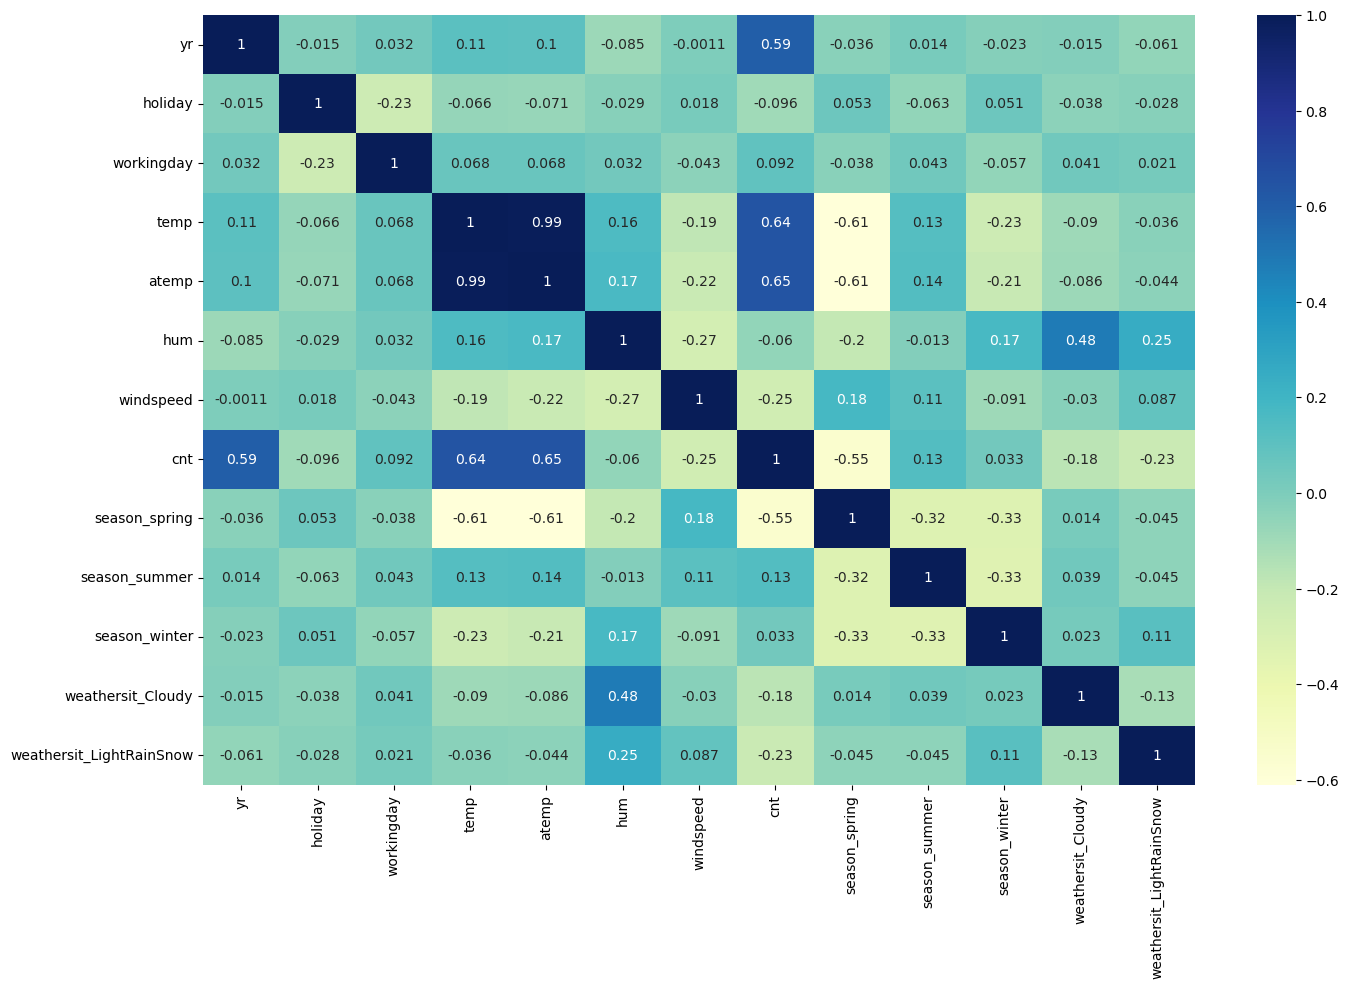

In [1289]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [1290]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.


**Outcome**.
- LR model was created using statsmodels
- **'atemp'** was dropped since it had high VIF and p-value
- **'hum'** was dropped since it had high VIF 
- **'workingday'** was dropped since it had high p-value 

In [1292]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const                       0.280290
yr                          0.230318
holiday                    -0.074601
workingday                  0.017504
temp                        0.464536
atemp                       0.032110
hum                        -0.138668
windspeed                  -0.179510
season_spring              -0.074947
season_summer               0.041347
season_winter               0.088469
weathersit_Cloudy          -0.054429
weathersit_LightRainSnow   -0.242222
dtype: float64

In [1293]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.0
Date:                Fri, 24 Jan 2025   Prob (F-statistic):          1.86e-181
Time:                        16:17:58   Log-Likelihood:                 488.03
No. Observations:                 510   AIC:                            -950.1
Df Residuals:                     497   BIC:                            -895.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [1294]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1295]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,374.87
4,atemp,365.50
5,hum,27.39
6,windspeed,4.88
7,season_spring,3.84
9,season_winter,3.20
2,workingday,3.19
8,season_summer,2.35
10,weathersit_Cloudy,2.28
0,yr,2.08


In [1296]:
# Dropping field atemp sonce that has both high VIF and p-value
X = X_train.drop('atemp',axis=1)

In [1297]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [1298]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.6
Date:                Fri, 24 Jan 2025   Prob (F-statistic):          1.26e-182
Time:                        16:17:58   Log-Likelihood:                 488.00
No. Observations:                 510   AIC:                            -952.0
Df Residuals:                     498   BIC:                            -901.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [1299]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,27.33
3,temp,15.16
5,windspeed,4.65
6,season_spring,3.77
2,workingday,3.19
8,season_winter,3.07
9,weathersit_Cloudy,2.28
7,season_summer,2.26
0,yr,2.08
10,weathersit_LightRainSnow,1.24


In [1300]:
# Dropping field 'hum' since that has both high VIF
X = X.drop('hum', axis=1)

In [1301]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [1302]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Fri, 24 Jan 2025   Prob (F-statistic):          3.79e-181
Time:                        16:17:58   Log-Likelihood:                 481.67
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [1303]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,4.59
3,temp,4.49
2,workingday,3.15
5,season_spring,2.12
0,yr,2.07
6,season_summer,1.83
7,season_winter,1.68
8,weathersit_Cloudy,1.53
1,holiday,1.09
9,weathersit_LightRainSnow,1.08


In [1304]:
# Dropping 'workingday' since that has a high p-value
X = X.drop('workingday', axis=1)

In [1305]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [1306]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.0
Date:                Fri, 24 Jan 2025   Prob (F-statistic):          1.42e-181
Time:                        16:17:58   Log-Likelihood:                 479.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     500   BIC:                            -897.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [1307]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.56
0,yr,2.07
4,season_spring,1.96
5,season_summer,1.79
6,season_winter,1.62
7,weathersit_Cloudy,1.52
8,weathersit_LightRainSnow,1.08
1,holiday,1.04


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [1309]:
y_train_count = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

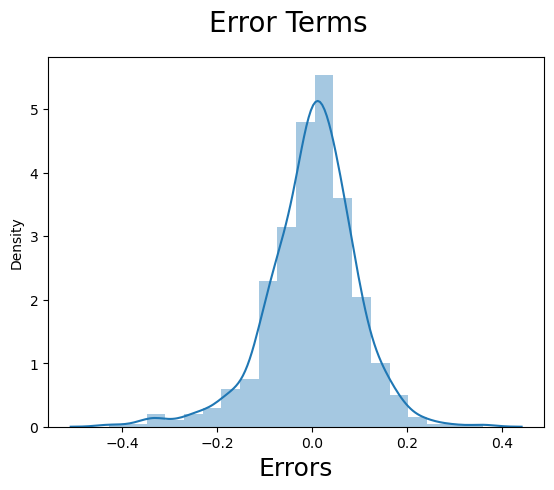

In [1310]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [1311]:
fitted_values = lr_4.fittedvalues

In [1312]:
residuals = lr_4.resid

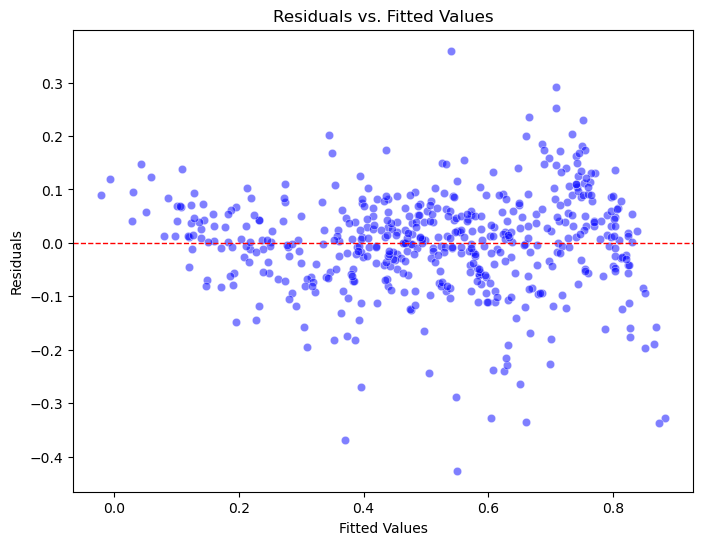

In [1313]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.5, color='blue')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Horizontal line at y=0 for reference
plt.show()

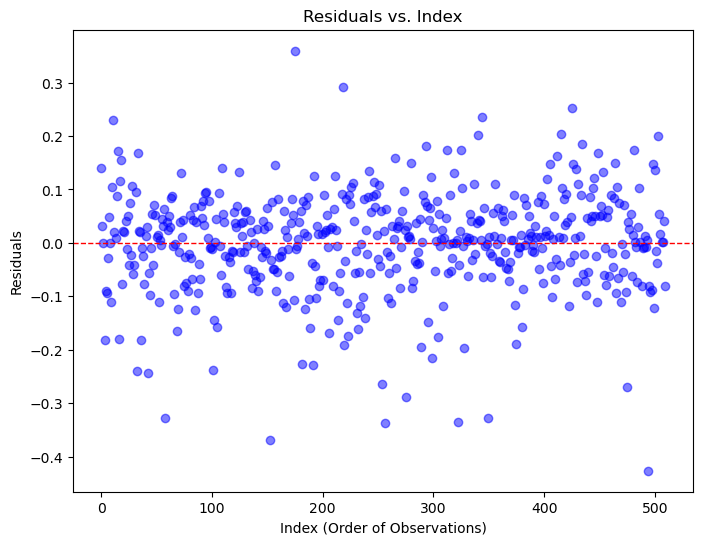

In [1314]:

# Plot residuals vs. index (or order of observations)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.5, color='blue')
plt.title('Residuals vs. Index')
plt.xlabel('Index (Order of Observations)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Adding a horizontal line at 0 for reference
plt.show()

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [1316]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1317]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1318]:
X_test = sm.add_constant(X_test)

In [1319]:
X_test = X_test.drop(["atemp", "workingday", "hum"], axis = 1)

In [1320]:
y_pred = lr_4.predict(X_test)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

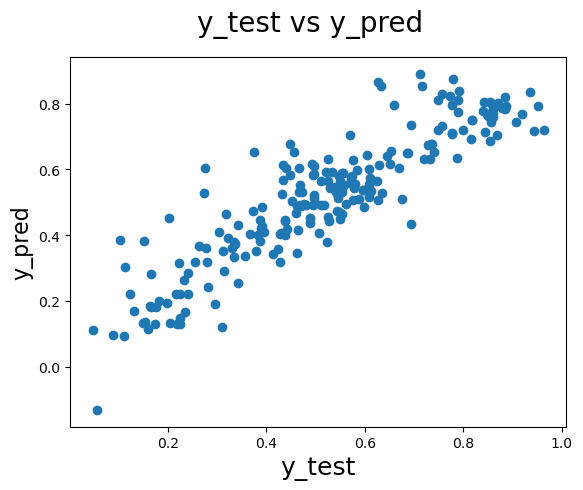

In [1322]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [1323]:
lr_4.params

const                       0.222331
yr                          0.234019
holiday                    -0.087727
temp                        0.466651
windspeed                  -0.154649
season_spring              -0.082379
season_summer               0.037133
season_winter               0.075960
weathersit_Cloudy          -0.076343
weathersit_LightRainSnow   -0.279446
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.234  \times  yr - 0.087  \times  holiday + 0.466 \times temp - 0.154 \times windspeed - 0.082 \times season_spring + 0.037 \times season_summer + 0.075 \times season_winter - 0.076 \times weathersit_Cloudy - 0.279 \times weathersit_LightRainSnow $

In [1325]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8009724887482659
